Consider reading from and writing to compressed hdf, see [performance comparison](http://pandas.pydata.org/pandas-docs/stable/io.html#performance-considerations):

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
#import cProfile
import time

In [3]:
columns = ['Anon Student Id', \
           'Session Id', \
           'Duration (sec)', \
           'Student Response Type', \
           'Problem Name', \
           'Problem View', \
           'Attempt At Step', \
           'Outcome', \
           'Time']

In [4]:
print("Loading ds92 data:")
ds92_data = pd.read_csv("wpi-assistments/math_2004_2005/ds92_tx_All_Data_172_2016_0504_081852.txt", sep="\t", low_memory=False)
ds92_data = ds92_data[columns]
print(ds92_data.shape)

print("Loading ds120 data:")
ds120_data = pd.read_csv("wpi-assistments/math_2005_2006/ds120_tx_All_Data_265_2017_0414_065125.txt", sep="\t", low_memory=False)
ds120_data = ds120_data.copy()[columns]
print(ds120_data.shape)

print("Loading ds339 data:")
ds339_data = pd.read_csv("wpi-assistments/math_2006_2007/ds339_tx_All_Data_1059_2015_0729_215742.txt", sep="\t", low_memory=False)
ds339_data = ds339_data.copy()[columns]
print(ds339_data.shape)

Loading ds92 data:
(580785, 9)
Loading ds120 data:
(685615, 9)
Loading ds339 data:
(1451003, 9)


In [5]:
i = 1
for df in [ds92_data, ds120_data, ds339_data]:
    print(">> Processing dataset {}:".format(i))
    df['Day'] = df['Time'].apply(lambda x: x.split(" ")[0])
    df.drop(['Time'], axis=1, inplace=True)
    df['Duration (sec)'] = df['Duration (sec)'].replace({'.': 0}).astype(float)
    df['Student Response Type'] = df['Student Response Type'].replace({'ATTEMPT': 0, 'HINT_REQUEST': 1})
    df['Outcome'] = df['Outcome'].replace({'CORRECT': 0, 'INCORRECT': 1, 'HINT': 2})
    #adding_x(df)
    i += 1
data = pd.concat([ds92_data, ds120_data, ds339_data], ignore_index=True)
data.info()

>> Processing dataset 1:
>> Processing dataset 2:
>> Processing dataset 3:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2717403 entries, 0 to 2717402
Data columns (total 9 columns):
Anon Student Id          object
Session Id               int64
Duration (sec)           float64
Student Response Type    int64
Problem Name             int64
Problem View             float64
Attempt At Step          float64
Outcome                  float64
Day                      object
dtypes: float64(4), int64(3), object(2)
memory usage: 186.6+ MB


In [6]:
data.head(20)

,Anon Student Id,Session Id,Duration (sec),Student Response Type,Problem Name,Problem View,Attempt At Step,Outcome,Day
0,Stu_001d187b1b375fe98b88696b250177f0,647501,102.0,1,2218,1.0,1.0,2.0,2004-11-10
1,Stu_001d187b1b375fe98b88696b250177f0,647501,46.0,0,2218,1.0,2.0,0.0,2004-11-10
2,Stu_001d187b1b375fe98b88696b250177f0,647792,70.0,1,3093,1.0,1.0,2.0,2004-11-10
3,Stu_001d187b1b375fe98b88696b250177f0,647792,22.0,1,3093,1.0,1.0,2.0,2004-11-10
4,Stu_001d187b1b375fe98b88696b250177f0,647792,2.0,1,3093,1.0,2.0,2.0,2004-11-10
5,Stu_001d187b1b375fe98b88696b250177f0,647792,2.0,1,3093,1.0,3.0,2.0,2004-11-10
6,Stu_001d187b1b375fe98b88696b250177f0,647792,23.0,1,3093,1.0,4.0,2.0,2004-11-10
7,Stu_001d187b1b375fe98b88696b250177f0,647792,13.0,0,3093,1.0,5.0,1.0,2004-11-10
8,Stu_001d187b1b375fe98b88696b250177f0,647792,9.0,0,3093,1.0,6.0,1.0,2004-11-10
9,Stu_001d187b1b375fe98b88696b250177f0,647792,54.0,0,3093,1.0,7.0,1.0,2004-11-10


# Test new adding_x algorithms:

**Note to reviewers**: the algorithm is quite slow (~25 minutes), so you may consider adding `'x'` variable (number of attempt) to a substantial subset of ASSISTments dataset (e.g. processing 100,000 rows takes only ~0.5 minites).

In [22]:
#df = data.head(200000).copy()
#df = data.copy()

def adding_x(df):
    j = 0
    start_time = time.time()
    df['x'] = 0
    df_attempts = df[df['Student Response Type'] == 0].copy()
    stud_list = df_attempts['Anon Student Id'].unique()
    for student in stud_list:
        print("\r\t>>> Progress\t:{:.4%}".format((j + 1)/len(stud_list)), end='')
        j += 1
        stud = []
        stud.append(student)
        data_stud = df_attempts[np.in1d(df_attempts['Anon Student Id'], stud)].copy()
        for problem in data_stud['Problem Name'].unique():
            prob = []
            prob.append(problem)
            data_prob = data_stud[np.in1d(data_stud['Problem Name'], prob)].copy()
            data_stud.loc[data_prob.index,'x'] = range(1,len(data_prob)+1)
        df_attempts.loc[data_stud.index,'x']  = data_stud['x']
    end_time = time.time()
    print("\n\t>>> Exec. time\t:{}s".format(end_time-start_time))
    return df_attempts

#adding_x()
#cProfile.runctx('adding_x(); print', globals(), {'n':20}, sort='cumtime')
#data_x = adding_x(data.head(100000).copy())
data_x = adding_x(data.copy())
data['x'] = 0
data.loc[data_x.index,'x'] = data_x['x']
data[data['x'] > 0].shape

	>>> Progress	:100.0000%
	>>> Exec. time	:1435.3001832962036s


(1916511, 10)

# Writing data to hdf, reading back and compare

In [27]:
def hdf_fixed_write_compress(df):
    df.to_hdf('data.hdf','test',mode='w',complib='blosc')
    return

def hdf_fixed_read_compress():
    df = pd.read_hdf('data.hdf','test')
    return df

In [28]:
hdf_fixed_write_compress(data)

data1 = hdf_fixed_read_compress()
ne = data[data != data1]
ne.dropna(axis=0, how='all', inplace=True)
ne.shape[0]

0

In [29]:
! ls -lh data.hdf

-rw-rw-r-- 1 dima806 dima806 73M Oct 23 10:30 data.hdf


# Creating visualisation:

In [31]:
s1 = data[data['Outcome'] <= 1].groupby(['x']).agg(len)['Problem Name']

s2 = data[data['Outcome'] == 1].groupby(['x']).agg(len)['Problem Name']

s1[8] = s1.loc[8:].sum()
for i in range(9, int(s1.index.max()+1)):
    try:
        s1.drop(i, inplace=True)
    except ValueError:
        pass

s2[8] = s2.loc[8:].sum()
for i in range(9, int(s2.index.max()+1)):
    try:
        s2.drop(i, inplace=True)
    except ValueError:
        pass

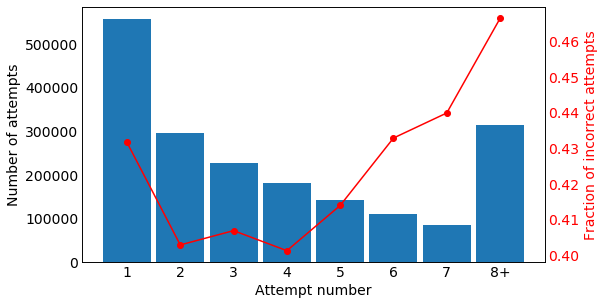

In [37]:
# In case of wrong x labelling, simply run this cell 2 times:

fig, ax1 = plt.subplots()
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8.3
fig_size[1] = 4.7
plt.rcParams["figure.figsize"] = fig_size
plt.xlim(0.5,8.5)
plt.bar(s1.index, s1, width=0.9)
#plt.bar(s2.index, s2, width=0.9)
#plt.legend(['CORRECT', 'INCORRECT'])

plt.xlabel("Attempt number", size=14)
plt.ylabel("Number of attempts", size=14)
ax1.tick_params(axis ='both', which='major', length=0, labelsize =14, color='black')
ax1.tick_params(axis ='both', which='minor', length=0)
labels = [item.get_text() for item in ax1.get_xticklabels()]
labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8+']
#print(labels)

ax2 = ax1.twinx()
ax2.plot(s1.index, s2/s1, 'r-o')
ax2.set_ylabel('Fraction of incorrect attempts', size=14, color='r')
ax2.tick_params('y', colors='r')
ax2.tick_params(axis ='both', which='minor', length=0)
ax2.tick_params(axis ='both', which='major', length=0, labelsize =14, color='red')

ax1.set_xticklabels(labels)

plt.show()
fig.savefig('data-visualisation.png')